## Question 2

We can use self organizing maps as a substitute for K-means.

In Assignment 2, Question 2, K-means was used to compute the number of hidden layer neurons to be used in an RBF network. Using a 2D self-organizing map compare the clusters when compared to K-means for the MNIST data. Sample the data to include only images of '1' and '5'. Use the scikit-learn utilities to load the data. You are expected to (a) **document the dimensions of the SOM computed and the learning parameters used to generate it** (b) **provide 2D plots of the regions for '1' and '5' for both the SOM and K-means solutions.** You may project your K-means data using SVD to 2 dimensions for display purposes.

### Setup

The first thing we'll do is pull in the mnist dataset, and filter out specifically 1's and 5's.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from minisom import MiniSom
from random import shuffle

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.cache')
t = mnist.target.tolist()

def partition(label):
    return [(x, label) for x in mnist.data[t.index(label) : t.index(label + 1)]]

In [5]:
ones = partition(1)
fives = partition(5)

dataset = ones + fives
shuffle(dataset)

### Self Organizing Map
** Part a) Document the dimensions of the SOM computed and the learning parameters used to generate it **

Note: `minisom` is used for demonstration purposes.

To install:

```
pip install minisom
```


We'll initialize a self organizing map with the following parameters:

In [6]:
x_dim = 20
y_dim = 20
input_len = 784
sigma = .9 # spread of neighbourhood function
learning_rate = .25

som = MiniSom(x_dim, y_dim, input_len, sigma=sigma, learning_rate=learning_rate)

We'll then perform train random over 1500 epochs.  

** Part b) provide 2D plots of the regions for '1' and '5' for both the SOM and K-means solutions. You may project your K-means data using SVD to 2 dimensions for display purposes. **

Before training we can see that the data is unorganized, I will plot out attempted self organizing map winning candidates for given input vector.

In [61]:
def som_demo(title):
    plt.figure(figsize=(5, 5))

    for index, item in enumerate(dataset):
        image, label = item
        i, j = som.winner(image)
        plt.text(i, j, str(label), color=plt.cm.Dark2(label / 5.), fontdict={'size': 12})
    plt.axis([0, x_dim, 0, y_dim])
    plt.title(title)
    plt.show()

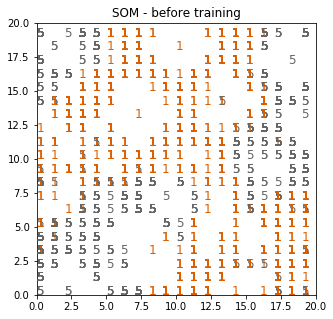

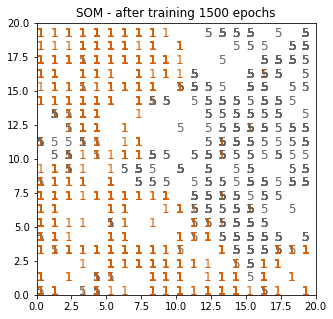

In [62]:
som_demo('SOM - before training')
epochs = 1500
som.train_random([i[0] for i in dataset[:1024]], epochs)
som_demo('SOM - after training %s epochs' % epochs)

It can be seen that after training the data begins to partition based on image label.

####  KMeans 

PCA allows dimensionality reduction using SVD (Singular Value Decomposition). This allows us to project the data into a lower dimensional space (i.e 2d)

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

def min_max(np_arr):
    return [np_arr.min() - 1, np_arr.max() + 1]

rd = PCA(n_components=2).fit_transform([scale(x[0]) for x in dataset[:1024]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(rd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

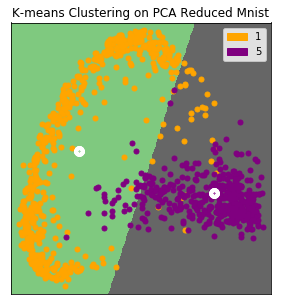

In [76]:
plt.figure(figsize=(5, 5))

x_min, x_max = min_max(rd[:,0])
y_min, y_max = min_max(rd[:,1])

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1), np.arange(y_min, y_max, .1))
bounds = [xx.min(), xx.max(), yy.min(), yy.max()]
predictions = kmeans.predict(zip(xx.flatten(), yy.flatten()))
plt.imshow(predictions.reshape(xx.shape), extent=bounds, cmap=plt.cm.Accent_r, origin='lower')

legend = []
for label, color in [(1, 'orange'), (5, 'purple')]:    
    _ = np.array([rd[i] for i in range(1024) if dataset[i][1] is label])
    plt.plot(_[:, 0], _[:, 1], 'k.', markersize=10, color=color)
    legend.append(patches.Patch(color=color, label=str(label)))

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=1, color='w', zorder=10, marker='*', linewidth=10)

plt.title('K-means Clustering on PCA Reduced Mnist')
plt.legend(handles=legend)
plt.xticks([])
plt.yticks([])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In the above visualization, the color of the small data points represents the cluster to which they have been assigned. The larger circles are the cluster centroids, with their color indicating the cluster that they represent. For illustrative purposes, I've also shaded subregions depending on which centroid they are closest to. This is called a Voronoi diagram.

The depiction above is known as a **Voronoi dagram**. The larger white points represent centroids, the colored points represent the data (orange=1, purple=5). Regions are partitioned based on distance to centroid. The green area represents datapoints labeled as 1's, and grey as datapoints with label as 5.